In [91]:
import pandas as pd
import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [92]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2015,1,1)

#### Create a DataFrame of the "XOM" stock from Morningstar Finance API and output the first five rows

In [93]:
df = pdr.DataReader("XOM", "morningstar", start, end)
print(df.head())

                   Close   High     Low   Open    Volume
Symbol Date                                             
XOM    2010-01-01  68.19  68.86  68.110  68.84         0
       2010-01-04  69.15  69.26  68.190  68.72  27811317
       2010-01-05  69.42  69.45  68.800  69.19  30178588
       2010-01-06  70.02  70.60  69.340  69.45  35047453
       2010-01-07  69.80  70.06  69.415  69.90  27194133


#### Plot the "Close" column of the DataFrame

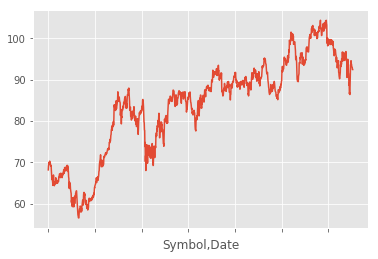

In [94]:
df['Close'].plot()

#### Create a dictionary and turn it into a DataFrame

In [95]:
web_stats = {'Day': range(1,7), 
             'Visitors': [43,53,34,45,64,34], 
             'Bounce_Rate': [65,72,62,64,54,66]}
df = pd.DataFrame(web_stats)
df

,Bounce_Rate,Day,Visitors
0,65,1,43
1,72,2,53
2,62,3,34
3,64,4,45
4,54,5,64
5,66,6,34


#### Set Index of the DataFrame to the "Day" column

In [96]:
df.set_index("Day", inplace=True)
df

,Bounce_Rate,Visitors
Day,,
1,65,43
2,72,53
3,62,34
4,64,45
5,54,64
6,66,34


#### Print a column of the DataFrame - Two ways

In [97]:
df["Visitors"]
df.Visitors

Day
1    43
2    53
3    34
4    45
5    64
6    34
Name: Visitors, dtype: int64

#### Print multiple columns of the DataFrame

In [98]:
df[['Visitors','Bounce_Rate']] #two brackets because of calling a list of columns

,Visitors,Bounce_Rate
Day,,
1,43,65
2,53,72
3,34,62
4,45,64
5,64,54
6,34,66


#### Turn column of DataFrame to a list

In [99]:
visitor_list = df.Visitors.tolist()
visitor_list

[43, 53, 34, 45, 64, 34]

# IO Basics

#### Read a CSV into a DataFrame

In [100]:
import quandl
home_df = pd.read_csv('ZILLOW_Prices.csv')
home_df.head()

,Date,Value
0,2018-03-31,2385.0
1,2018-02-28,2384.0
2,2018-01-31,2372.0
3,2017-12-31,2357.0
4,2017-11-30,2344.0


In [101]:
home_df.set_index('Date', inplace=True)
home_df.head()

,Value
Date,
2018-03-31,2385.0
2018-02-28,2384.0
2018-01-31,2372.0
2017-12-31,2357.0
2017-11-30,2344.0


#### Save to CSV

In [102]:
home_df.to_csv('home.csv')

In [103]:
home1_df = pd.read_csv('home.csv')
home1_df.head()

,Date,Value
0,2018-03-31,2385.0
1,2018-02-28,2384.0
2,2018-01-31,2372.0
3,2017-12-31,2357.0
4,2017-11-30,2344.0


In [104]:
home1_df = pd.read_csv('home.csv', index_col=0)
home1_df.head()

,Value
Date,
2018-03-31,2385.0
2018-02-28,2384.0
2018-01-31,2372.0
2017-12-31,2357.0
2017-11-30,2344.0


#### Rename a Column

In [105]:
home1_df.columns = ['Alpharetta_Prices']
home1_df.head()

,Alpharetta_Prices
Date,
2018-03-31,2385.0
2018-02-28,2384.0
2018-01-31,2372.0
2017-12-31,2357.0
2017-11-30,2344.0


In [106]:
home1_df.to_csv('home1.csv',header=False)
home2_df = pd.read_csv('home1.csv', names=['Date','Alpharetta_HPI'],index_col=0)
home2_df.head()

,Alpharetta_HPI
Date,
2018-03-31,2385.0
2018-02-28,2384.0
2018-01-31,2372.0
2017-12-31,2357.0
2017-11-30,2344.0


#### Rename Specific Column

In [107]:
home2_df.rename(columns={'Alpharetta_HPI': 'Alpharetta_Prices'}, inplace=True)
home2_df.head()

,Alpharetta_Prices
Date,
2018-03-31,2385.0
2018-02-28,2384.0
2018-01-31,2372.0
2017-12-31,2357.0
2017-11-30,2344.0


# Building a Dataset

#### Use Quandle API

In [108]:
api_key = open('quandlapikey.txt','r').read()
fmac_df = quandl.get('FMAC/HPI_AK', authtoken=api_key)
fmac_df.head()

,Value
Date,
1975-01-31,34.371830
1975-02-28,34.880945
1975-03-31,35.402217
1975-04-30,35.944703
1975-05-31,36.535272


#### Read HTML into a List of DataFrames

#### Select a DataFrame from the List of DataFrame

In [134]:
def state_list():
    states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations')
    fifty = states[0]
    fifty = fifty.iloc[12:63][3]
    return fifty

state_list().head()

12    AL
13    AK
14    AZ
15    AR
16    CA
Name: 3, dtype: object

#### Select the Rows of the Dataframe by index

#### Select Column of Dataframe that corresponds to the State's Abbreviation

In [119]:
for abbv in fifty_states[3]:
    print("FMAC/HPI_"+str(abbv))

# Pickling

In [154]:
def grab_state_initials():
    main_df = pd.DataFrame()
    for ab in fifty_states[3]:
        query = "FMAC/HPI_"+str(ab)
        df = quandl.get(query, authtoken=api_key)
        df.columns = [ab]
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    return main_df

#### Use Pickle Module to save Object rather than csv

In [155]:
import pickle

In [156]:
def save_object():
    pickle_out = open('fifty_states.pickle','wb')
    pickle.dump(grab_state_initials(), pickle_out)
    pickle_out.close

In [157]:
pickle_in = open('fifty_states.pickle','rb')
HPI_data = pickle.load(pickle_in)

In [158]:
HPI_data.to_pickle('pickle.pickle')
HPI_data2 = pd.read_pickle('pickle.pickle')
HPI_data2.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.695975,34.371830,28.937735,36.738861,15.722312,19.603977,24.369431,27.264842,18.255987,30.997043,...,37.722210,32.179633,32.602350,24.698474,26.637620,27.912640,17.484315,41.002072,28.096764,31.668794
1975-02-28,35.896770,34.880945,29.463708,37.098962,15.775202,19.837138,24.908036,27.250734,18.382701,32.229049,...,37.319634,32.218599,32.944116,25.060977,26.956271,28.205810,17.571053,42.040473,28.486170,32.161920
1975-03-31,36.133518,35.402217,29.959514,37.416398,15.964942,20.073483,25.313556,27.268478,18.514587,34.027506,...,36.908861,32.296539,33.542975,25.381341,27.264731,28.420407,17.689717,43.122486,28.860737,32.680525
1975-04-30,36.425723,35.944703,30.345148,37.677813,16.275547,20.301864,25.541141,27.362673,18.689302,36.218077,...,36.498238,32.416385,34.402826,25.627200,27.546568,28.578762,17.818792,44.239196,29.185048,33.210124
1975-05-31,36.695708,36.535272,30.546449,37.921099,16.533017,20.495075,25.614056,27.561893,18.937116,36.437855,...,36.121328,32.563209,34.649755,25.782334,27.794738,28.717611,17.933277,45.363222,29.443523,33.714128


# Percent Change and Correlation Tables

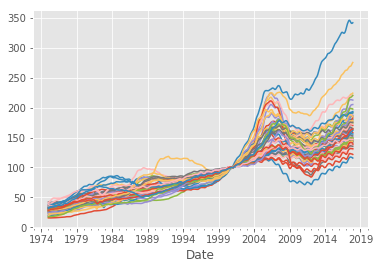

In [159]:
HPI_data2.plot()
plt.legend().remove()

#### pct_change is the percent change from previous value

In [160]:
def grab_state_initials():
    main_df = pd.DataFrame()
    for ab in fifty_states[3]:
        query = "FMAC/HPI_"+str(ab)
        df = quandl.get(query, authtoken=api_key)
        df.columns = [ab]
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    return main_df

In [161]:
save_object()

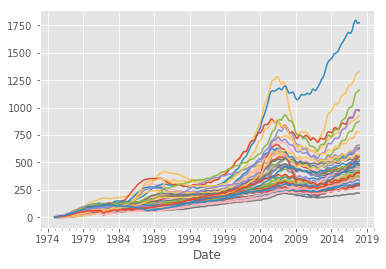

In [167]:
HPI_data = grab_state_initials()
HPI_data.plot()
plt.legend().remove()

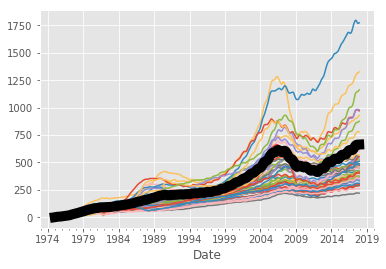

In [171]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df.columns = ['United States']
    df["United States"] = (df["United States"] - df["United States"][0]) / df["United States"][0] * 100
    return df
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

benchmark = HPI_Benchmark()
HPI_data.plot(ax = ax1)
benchmark.plot(ax = ax1, color = 'k', linewidth=10)
plt.legend().remove()

#### Correlation Between States

In [175]:
HPI_State_Correlation = HPI_data.corr()
HPI_State_Correlation.head()
HPI_State_Correlation.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.968903,0.943842,0.936927,0.971336,0.949137,0.950786,0.925384,0.961098,0.927123,0.934232,...,0.961505,0.970239,0.933180,0.957610,0.963229,0.967269,0.966261,0.964743,0.964327,0.943506
std,0.026199,0.039298,0.025501,0.025374,0.022035,0.030071,0.041548,0.028919,0.043348,0.028322,...,0.033578,0.025051,0.040177,0.030824,0.029123,0.024811,0.023235,0.030485,0.026282,0.041253
min,0.882021,0.789730,0.862478,0.872360,0.879030,0.850228,0.814481,0.872770,0.759684,0.852304,...,0.827538,0.869478,0.807780,0.861735,0.850858,0.857898,0.877117,0.843745,0.887492,0.786434
25%,0.953754,0.932997,0.923539,0.964267,0.938087,0.937233,0.897474,0.949738,0.914562,0.918276,...,0.951094,0.959994,0.916252,0.944197,0.955144,0.960874,0.958597,0.955650,0.952104,0.926865
50%,0.977369,0.954573,0.939341,0.978916,0.947571,0.957207,0.929113,0.965842,0.936322,0.933325,...,0.972216,0.976720,0.937394,0.965167,0.970892,0.973429,0.972113,0.974658,0.970380,0.954652
75%,0.985735,0.965288,0.947784,0.988917,0.963311,0.971608,0.956632,0.980168,0.954495,0.951643,...,0.982503,0.987833,0.961440,0.980700,0.980431,0.979182,0.979009,0.983731,0.984753,0.967009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Resampling
#### Taking milliseconds of data for a year, average it, and get the price

In [178]:
TX1yr = HPI_data['TX'].resample('A',how = 'mean') #Annual
TX1yr.head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


Date
1975-12-31     4.039782
1976-12-31    11.367589
1977-12-31    22.555985
1978-12-31    40.746679
1979-12-31    63.361461
Freq: A-DEC, Name: TX, dtype: float64

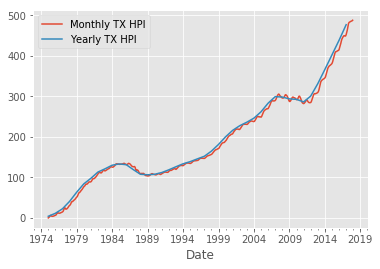

In [180]:
HPI_data['TX'].plot(label = 'Monthly TX HPI')
TX1yr.plot(label = 'Yearly TX HPI')
plt.legend()

# Handling Missing Data

In [184]:
HPI_data['TX1yr'] = HPI_data['TX'].resample('A',how = 'mean') #Annual
HPI_data[['TX','TX1yr']].head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,TX,TX1yr
Date,,
1975-01-31,0.000000,NaN
1975-02-28,1.048285,NaN
1975-03-31,2.885144,NaN
1975-04-30,5.522535,NaN
1975-05-31,6.279930,NaN


#### Delete

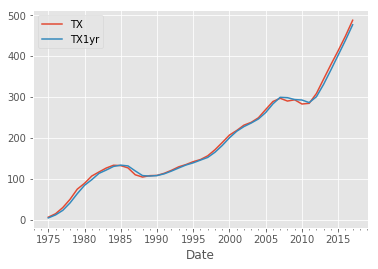

In [186]:
HPI_data1 = HPI_data.dropna()
HPI_data1[['TX','TX1yr']].plot()

#### Replace NaN with a number

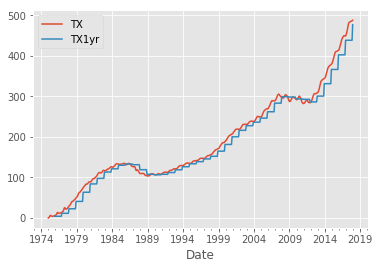

In [187]:
HPI_data2 = HPI_data.fillna(method='ffill') #Forward Fill
HPI_data2[['TX','TX1yr']].plot()

# Rolling Statistics

In [ ]:
HPI_data['TX12MA'] = HPI_data['TX'].resample('A',how = 'mean') #Annual
HPI_data2[['TX','TX12MA']].plot()